# 1.Preprocessing

In [4]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [5]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [6]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [7]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [8]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [9]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [10]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [11]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [12]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [13]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

# Race analysis

# a.) all applicant

In [14]:
skimmed_df['applicant_race_1']

0          5
1          2
2          6
3          5
4          5
          ..
1157690    7
1157691    4
1157692    6
1157693    6
1157694    7
Name: applicant_race_1, Length: 1157695, dtype: int64

In [15]:
RaceMap=code_map['race'].copy()
#genderMap[3]='Information not provided by applicant'

In [16]:
RaceMap

{1: 'American Indian or Alaska Native',
 2: 'Asian',
 3: 'Black or African American',
 4: 'Native Hawaiian or Other Pacific Islander',
 5: 'White',
 6: 'Information not provided by applicant in mail, Internet, or telephone application',
 7: 'Not applicable',
 8: 'No co-applicant'}

<AxesSubplot:title={'center':'Race Composition for All Applicants'}, ylabel='applicant_race_1'>

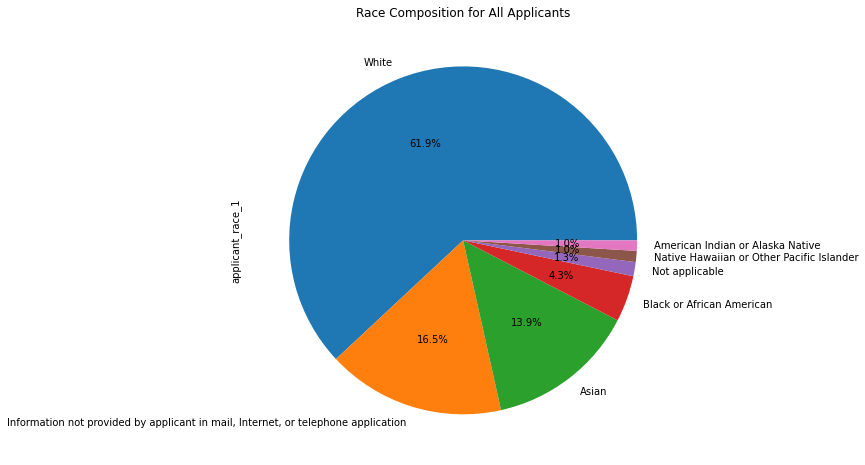

In [17]:
Race_total=skimmed_df['applicant_race_1'].value_counts()
plt.figure(figsize=(8,8))
Race_total=Race_total.rename(index=RaceMap)
Race_total.plot.pie(legend=False, title='Race Composition for All Applicants',autopct='%1.1f%%')
#plt.savefig(image_path+'Total_applicant_gender.png', bbox_inches='tight')

In [18]:
skimmed_df['action_taken']

0          3
1          3
2          1
3          3
4          2
          ..
1157690    3
1157691    3
1157692    3
1157693    3
1157694    3
Name: action_taken, Length: 1157695, dtype: int64

In [23]:
actionM=code_map['action_taken']
actionM

{1: 'Loan originated',
 2: 'Application approved but not accepted',
 3: 'Application denied by financial institution',
 4: 'Application withdrawn by applicant',
 5: 'File closed for incompleteness',
 6: 'Loan purchased by the institution',
 7: 'Preapproval request denied by financial institution',
 8: 'Preapproval request approved but not accepted'}

In [26]:
Race_result

,applicant_race_1,action_taken
0,5,3
1,2,3
2,6,1
3,5,3
4,5,2
...,...,...
1157690,7,3
1157691,4,3
1157692,6,3
1157693,6,3


<Figure size 1440x1440 with 0 Axes>

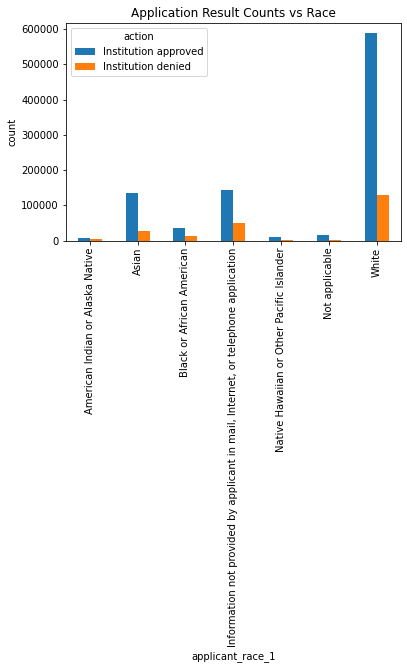

In [25]:
Race_result=skimmed_df[['applicant_race_1','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Race_result_b=pd.DataFrame()
Race_result_b['action']= Race_result['action_taken'].replace(RecodeAction)
Race_result_b['applicant_race_1']=Race_result['applicant_race_1'].replace(RaceMap)
Race_result_a1=Race_result_b.pivot_table(index='applicant_race_1', columns='action',aggfunc='size',fill_value=0)
plt.figure(figsize=(20,20))
Race_result_a1.plot.bar(title='Application Result Counts vs Race')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.savefig(image_path+'Application_result_count_race.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

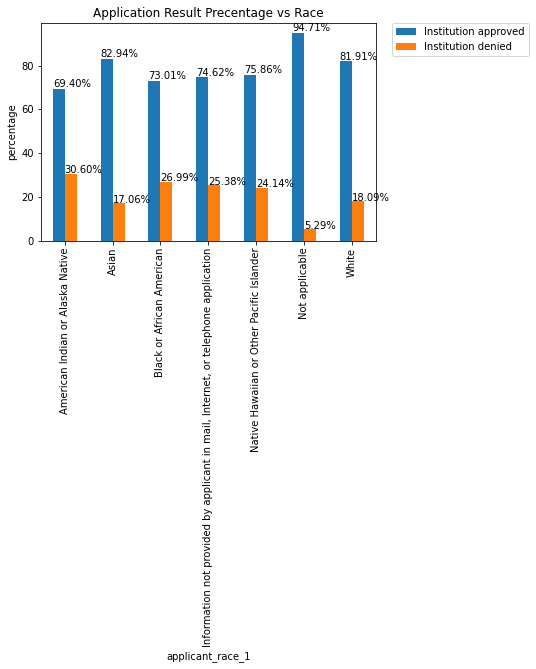

In [27]:
totalSA1=Race_result_a1.sum(axis=1)
Race_result_a2=Race_result_a1.T
temp=Race_result_a2/totalSA1.values
Race_result_a2=temp.T*100
plt.figure(figsize=(10,10))
SA2B=Race_result_a2.plot.bar(title='Application Result Precentage vs Race')
for p in SA2B.patches:
    SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(image_path+'Application_result_percentage_gender.png', bbox_inches='tight')

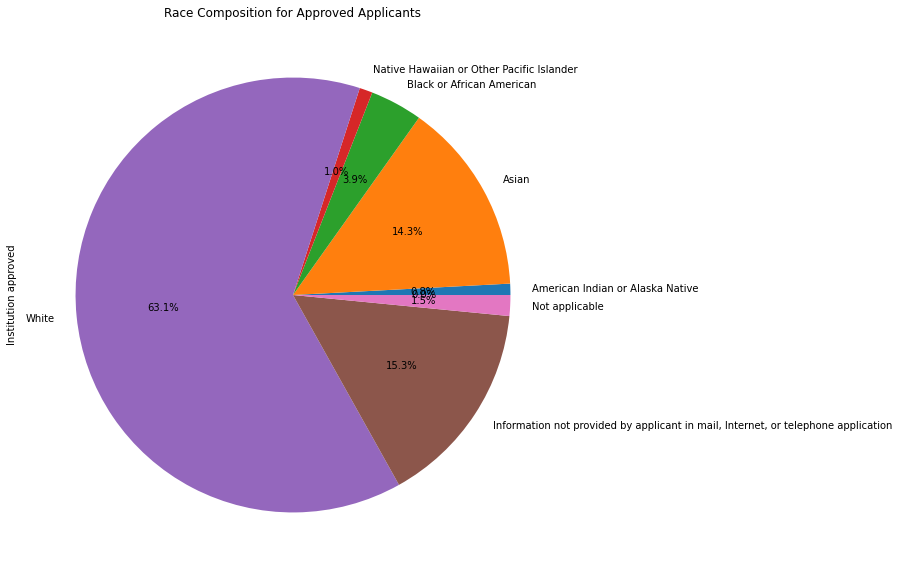

In [28]:
Race_result_approve=Race_result_a1['Institution approved'].reindex(index=list(RaceMap.values()))
plt.figure(figsize=(10,10))
Race_result_approve.plot.pie(legend=False, title='Race Composition for Approved Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Approved_applicant_race.png', bbox_inches='tight')

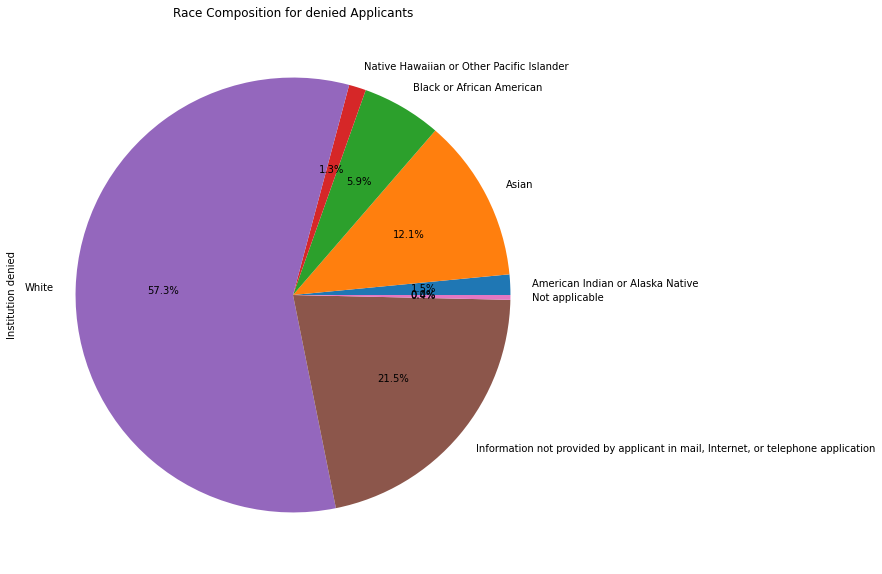

In [114]:
Race_result_approve=Race_result_a1['Institution denied'].reindex(index=list(RaceMap.values()))
plt.figure(figsize=(10,10))
Race_result_approve.plot.pie(legend=False, title='Race Composition for denied Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Approved_applicant_race.png', bbox_inches='tight')

In [116]:
skimmed_df['co_applicant_race_1'].value_counts()

8    594473
5    351413
6    102805
2     79958
3     15017
4      7825
1      4619
7      1585
Name: co_applicant_race_1, dtype: int64

# b. co-applicant vs no co-applicant

In [30]:
Coappli=skimmed_df[skimmed_df['co_applicant_race_1']!=8]
Nonco=skimmed_df[skimmed_df['co_applicant_race_1']==8]


In [31]:
Nonco['co_applicant_race_1']

1          8
4          8
5          8
6          8
8          8
          ..
1157690    8
1157691    8
1157692    8
1157693    8
1157694    8
Name: co_applicant_race_1, Length: 594473, dtype: int64

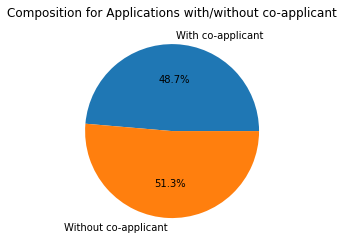

In [32]:
plt.figure()
plt.pie([len(Coappli),len(Nonco)],labels=['With co-applicant', 'Without co-applicant'],autopct='%1.1f%%')
plt.title('Composition for Applications with/without co-applicant')
plt.savefig(image_path+'Composition_for_Applications_with_or_without_co-applicant.png',bbox_inches='tight')

In [141]:
def pie_helper(value_counter,image_path,out_path,title):
        """
        a helper function for generating pie chart

        :param value_counter: value_counts dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        """
        df=value_counter.reindex(index=list(RaceMap.values()))
        plt.figure(figsize=(10,10))
        df.plot.pie(legend=False, title=title,autopct='%1.1f%%')
        plt.savefig(image_path+out_path, bbox_inches='tight')
  
        return
    

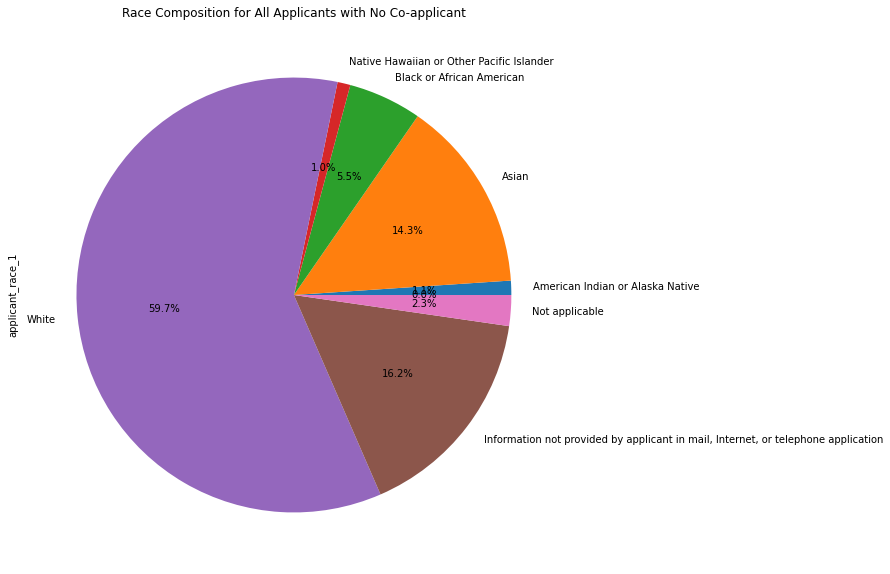

In [142]:
pie_helper(Nonco['applicant_race_1'].replace(RaceMap).value_counts(),image_path,
           'Race_composition_for_all_applicants_no_co-applicant.png','Race Composition for All Applicants with No Co-applicant')

In [144]:
 def pivot_value_helper(df,genderM):
        """
        get pivot table with gender value counts

        :param df: original data frame
        :return: the pivot table with gender value counts
        """
        Sex_result=df[['applicant_race_1','action_taken']]
        RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Sex_result_b=pd.DataFrame()
        Sex_result_b['action']= Sex_result['action_taken'].replace(RecodeAction)
        Sex_result_b['applicant_race_1']=Sex_result['applicant_race_1'].replace(genderM)
        Sex_result_a1=Sex_result_b.pivot_table(index='applicant_race_1', columns='action',aggfunc='size',fill_value=0)
        return Sex_result_a1

In [145]:
Noncopv=pivot_value_helper(Nonco,RaceMap)
Coapplipv=pivot_value_helper(Coappli,RaceMap)

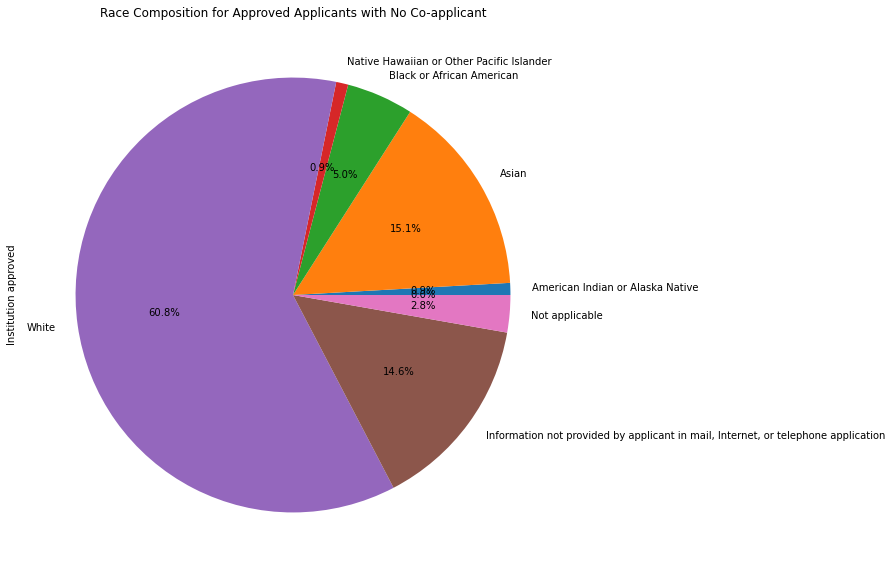

In [150]:
pie_helper(Noncopv['Institution approved'].reindex(index=list(RaceMap.values())),image_path,
           'Approved_applicants_race_no_co-applicant.png','Race Composition for Approved Applicants with No Co-applicant')

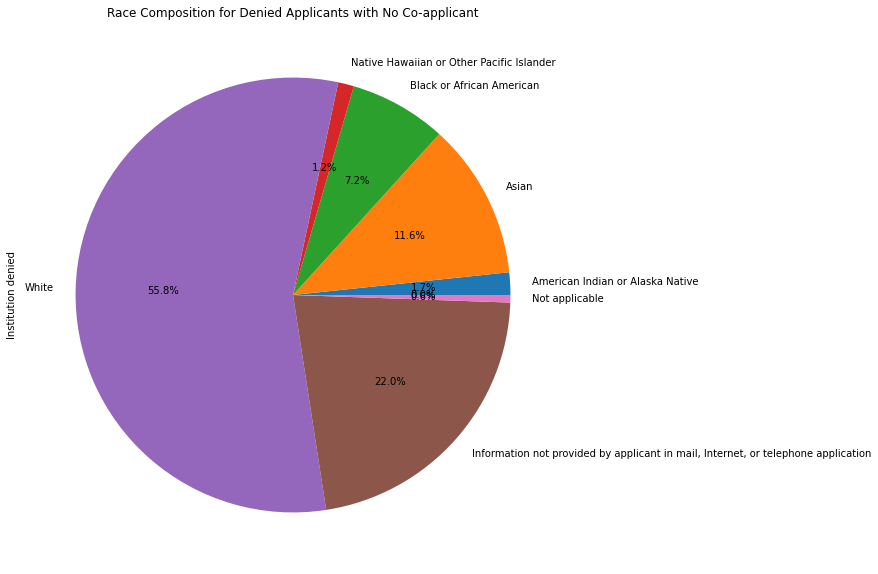

In [152]:
pie_helper(Noncopv['Institution denied'].reindex(index=list(RaceMap.values())),image_path,
           'Denied_applicants_race_no_co-applicant.png','Race Composition for Denied Applicants with No Co-applicant')

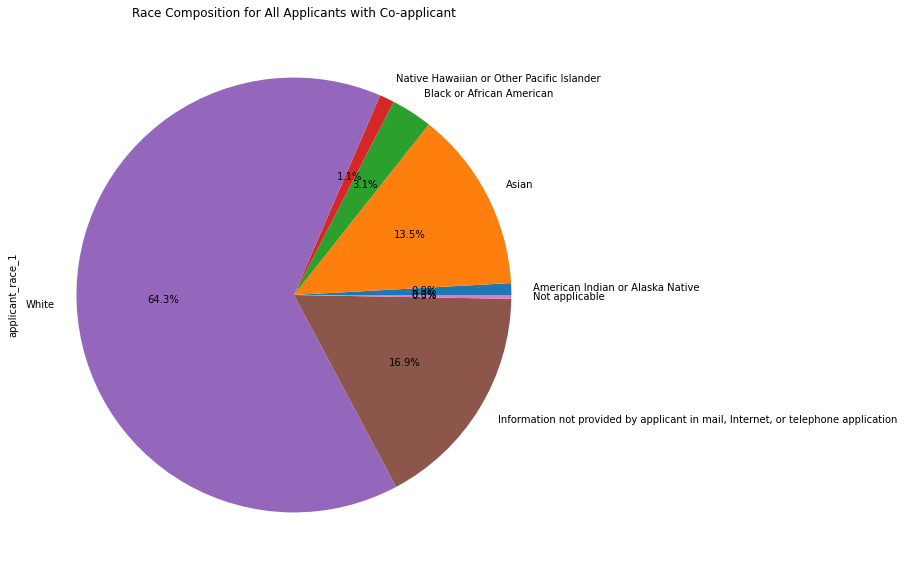

In [155]:
pie_helper(Coappli['applicant_race_1'].replace(RaceMap).value_counts(),image_path,
           'Race_composition_for_all_applicants_co-applicant.png','Race Composition for All Applicants with Co-applicant')

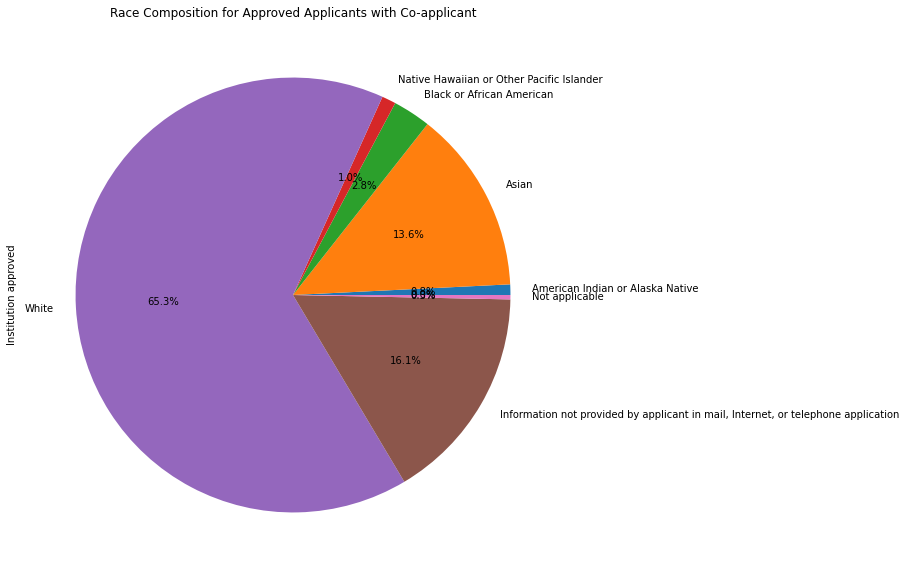

In [171]:
pie_helper(Coapplipv['Institution approved'].reindex(index=list(RaceMap.values())),image_path,
           'Approved_applicants_race_co-applicant.png','Race Composition for Approved Applicants with Co-applicant')

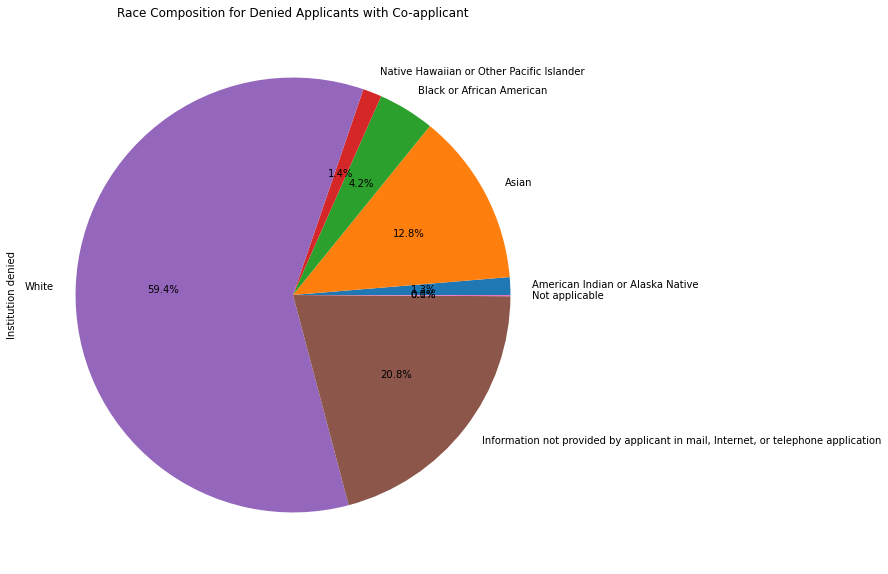

In [172]:
pie_helper(Coapplipv['Institution denied'].reindex(index=list(RaceMap.values())),image_path,
           'Denied_applicants_gender_co-applicant.png','Race Composition for Denied Applicants with Co-applicant')

# c.) Pair analysis

In [33]:
Cover=Coappli.copy()
Cover['Pair_Race']=Cover['applicant_race_1'].astype(str)+Cover['co_applicant_race_1'].astype(str)

In [34]:
PairDict={'11':"Main:Male,Co:Male",'12':'Main:Male,Co:Female','13':'Main:Male,Co:Unknown','14':'Main:Male,Co:Unknown',
         '21':"Main:Female,Co:Male",'22':'Main:Female,Co:Female','23':'Main:Female,Co:Unknown','24':'Main:Female,Co:Unknown',
         '31':"Main:Unknown,Co:Male",'32':'Main:Unknown,Co:Female','33':'Main:Unknown,Co:Unknown','34':'Main:Unknown,Co:Unknown',
         '41':"Main:Unknown,Co:Male",'42':'Main:Unknown,Co:Female','43':'Main:Unknown,Co:Unknown','44':'Main:Unknown,Co:Unknown'}

In [35]:
Cover['Pair_Race'].value_counts()

55    333500
66     89828
22     66704
33     12194
52     11228
56      9646
25      6659
65      4001
44      3875
35      3199
54      3187
11      2150
53      2110
15      2027
51      1827
26      1592
45      1556
36       812
77       717
32       706
62       702
57       541
75       471
76       328
42       322
16       308
24       298
46       291
21       270
23       265
63       241
12       238
34       204
67       198
61       190
64       168
31       107
13       102
27       100
14        93
43        86
41        71
72        58
73        19
37        17
47         9
71         4
17         3
Name: Pair_Race, dtype: int64

In [37]:
Race_result_pair=Cover[['Pair_Race','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Race_result_b_pair=pd.DataFrame()
Race_result_b_pair['action']= Race_result_pair['action_taken'].replace(RecodeAction)
Race_result_b_pair['Pair_Race']=Race_result_pair['Pair_Race']
Race_result_a1_pair=Race_result_b_pair.pivot_table(index='Pair_Race', columns='action',aggfunc='size',fill_value=0)
# plt.figure(figsize=(10,10))
# Sex_result_a1_pair.plot.bar(title='Application Result Counts vs Race Pairs')
# plt.ylabel('count')
# plt.xticks(rotation=45,ha='right')
# plt.savefig(image_path+'Application_result_count_gender_pair.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

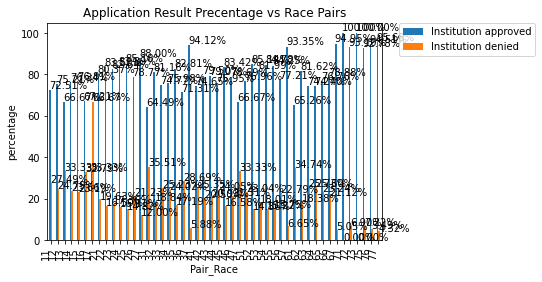

In [39]:
plt.figure(figsize=(10,10))
totalSA1_pair=Race_result_a1_pair.sum(axis=1)
Race_result_a2_pair=Race_result_a1_pair.T
temp=Race_result_a2_pair/totalSA1_pair.values
Race_result_a2_pair=temp.T*100

SA2B_pair=Race_result_a2_pair.plot.bar(title='Application Result Precentage vs Race Pairs')
for p in SA2B_pair.patches:
    SA2B_pair.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=90,ha='right')
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_race_pair.png', bbox_inches='tight')
plt.show()

In [170]:
RaceMap

{1: 'American Indian or Alaska Native',
 2: 'Asian',
 3: 'Black or African American',
 4: 'Native Hawaiian or Other Pacific Islander',
 5: 'White',
 6: 'Information not provided by applicant in mail, Internet, or telephone application',
 7: 'Not applicable',
 8: 'No co-applicant'}

<Figure size 1440x720 with 0 Axes>